<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/k_NN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.datasets import load_digits  # Импорт функции для загрузки набора данных рукописных цифр
from sklearn.model_selection import train_test_split  # Импорт функции для разбиения данных на обучающую и тестовую выборки
from sklearn.neighbors import KNeighborsClassifier  # Импорт классификатора k-ближайших соседей
from sklearn.metrics import classification_report  # Импорт функции для оценки качества модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации

In [17]:
# Загрузка набора данных рукописных цифр
data = load_digits()

# Просмотр ключей словаря с данными
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [18]:
# Размеры данных и изображений, а также максимальное значение в изображениях
data.data.shape  # Размерность массива признаков (количество образцов, количество признаков)
data.target.shape  # Размерность массива целевых меток
data.images.shape  # Размерность массива изображений (количество изображений, высота, ширина)
np.max(data.images)  # Максимальное значение пикселя в изображениях
data.data.shape, data.target.shape, data.images.shape, np.max(data.images)

((1797, 64), (1797,), (1797, 8, 8), np.float64(16.0))

In [19]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

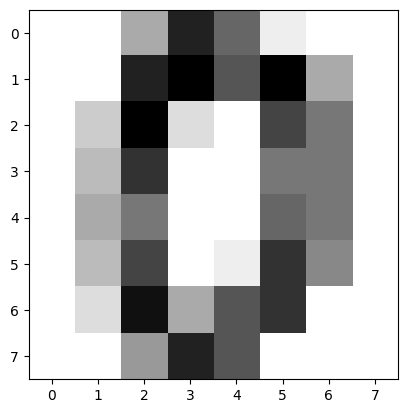

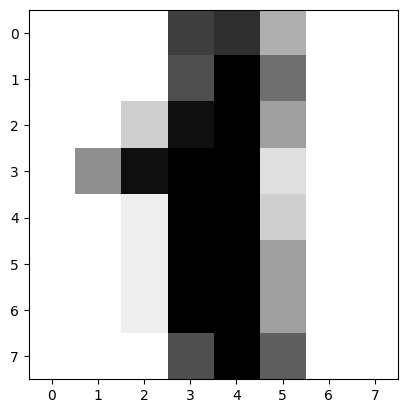

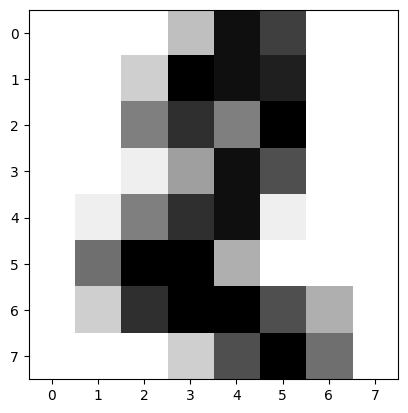

In [21]:
# Вывод первых нескольких изображений для визуализации
for image in data.images[:3]:
    plt.imshow(image, cmap=plt.cm.binary)  # Отображение изображения в черно-белой гамме
    plt.show()  # Показ изображения

In [22]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.data,  # Признаки
    data.target,  # Метки
    test_size=0.5  # Размер тестовой выборки (50% данных)
)

# Проверка размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [23]:
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [24]:
# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

In [25]:
# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.96      1.00      0.98        93
           2       0.99      0.98      0.98        97
           3       0.97      0.99      0.98        92
           4       0.98      1.00      0.99        88
           5       0.98      0.99      0.98        90
           6       1.00      1.00      1.00        80
           7       0.99      1.00      0.99        88
           8       0.98      0.95      0.96        93
           9       0.99      0.91      0.95        79

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [30]:
# Испортим модель увеличив параметр k-ближайших соседей для наглядности преобразований
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(n_neighbors=200, algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.84      0.61      0.71        93
           2       0.89      0.73      0.80        97
           3       0.82      0.91      0.87        92
           4       0.94      0.89      0.91        88
           5       0.91      0.77      0.83        90
           6       0.78      0.99      0.87        80
           7       0.83      0.97      0.89        88
           8       0.84      0.68      0.75        93
           9       0.59      0.84      0.69        79

    accuracy                           0.83       899
   macro avg       0.84      0.83      0.83       899
weighted avg       0.85      0.83      0.83       899



In [39]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[96,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0, 57,  8,  1,  0,  0,  8,  0,  7, 12],
       [ 1,  3, 71, 12,  0,  0,  2,  3,  3,  2],
       [ 0,  1,  0, 84,  0,  1,  0,  3,  0,  3],
       [ 0,  2,  0,  0, 78,  0,  4,  4,  0,  0],
       [ 0,  0,  0,  0,  1, 69,  2,  0,  0, 18],
       [ 1,  0,  0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 85,  2,  0],
       [ 1,  4,  1,  4,  1,  2,  3,  3, 63, 11],
       [ 1,  1,  0,  1,  3,  3,  0,  4,  0, 66]])

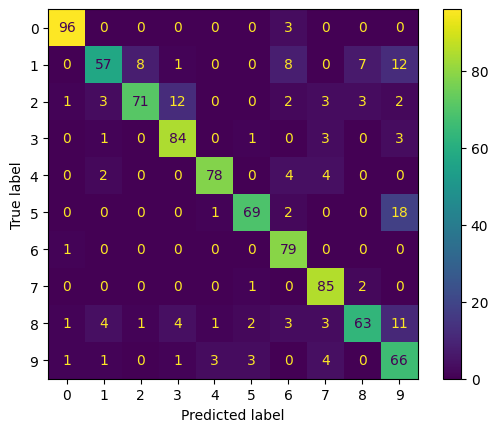

In [38]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.show()